## Distribution of categories

Debugging Help: 187
Code Snippet: 26
Conceptual Questions: 224
Complete Solution: 24
Multiple Choice (Quiz): 93
Student correction: 26
Language change: 8
Uncategorized: 37
Records --->>>>>: 628
Debugging Help: 29.78%
Code Snippet: 4.14%
Conceptual Question: 35.67%
Complete Solution: 3.82%
Multiple Choice: 14.81%
Students Correction: 4.14%
Language Change: 1.27%
Uncategorized: 5.89%


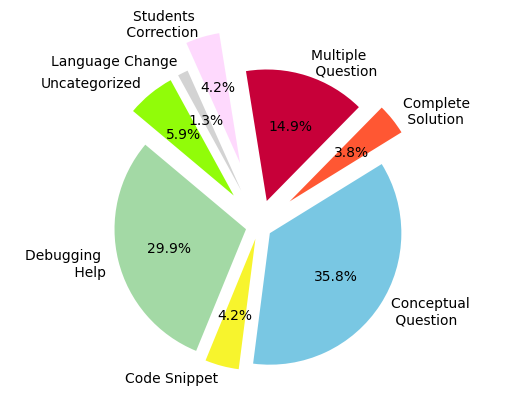

The files were successfully merged. The result was saved in 'merged_result.csv'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory where the CSV files are stored
directory_path = 'data'

# Delete old merged_result.csv file
if os.path.exists(directory_path + '/merged_result.csv'):
    os.remove(directory_path + '/merged_result.csv')
    print(" ### Cleared merged_result.csv file ### \n")

# Merge all CSV files in the directory
def merge_all_csv_files(directory):
    all_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    merged_df = pd.concat([pd.read_csv(os.path.join(directory, file), sep=';') for file in all_files])
    return merged_df

merged_df = merge_all_csv_files(directory_path)


# Counts Debugging Help
debugging_help = merged_df[merged_df['Classification'] == 'Debugging Help'].shape[0]
print(f"Debugging Help: {debugging_help}")

# Counts Code Snippet
code_snippet = merged_df[merged_df['Classification'] == 'Code Snippet'].shape[0]
print(f"Code Snippet: {code_snippet}")

# Counts Conceptual Questions
conceptual_questions = merged_df[merged_df['Classification'] == 'Conceptual Questions'].shape[0]
print(f"Conceptual Questions: {conceptual_questions}")

# Counts Complete Solution
complete_solution = merged_df[merged_df['Classification'] == 'Complete Solution'].shape[0]
print(f"Complete Solution: {complete_solution}")

# Counts Multiple Question Exercise
multiple_question_exercise = merged_df[merged_df['Classification'] == 'Multiple Question Exercise'].shape[0]
print(f"Multiple Choice (Quiz): {multiple_question_exercise}")

# Counts Student correction
student_correction = merged_df[merged_df['Classification'] == 'Student Correction'].shape[0]
print(f"Student correction: {student_correction}")

# Counts Language change
language_change = merged_df[merged_df['Classification'] == 'Language change'].shape[0]
print(f"Language change: {language_change}")

# Counts Uncategorized
uncategorized = merged_df[merged_df['Classification'] == 'Uncategorized'].shape[0]
print(f"Uncategorized: {uncategorized}")

# Total of records in the Classification column
total = merged_df['Classification'].count()

print(f"Records --->>>>>: {total}")

# Calculates the percentage of each classification
debugging_help_percentage = (debugging_help / total) * 100
code_snippet_percentage = (code_snippet / total) * 100
conceptual_questions_percentage = (conceptual_questions / total) * 100
complete_solution_percentage = (complete_solution / total) * 100
multiple_question_exercise_percentage = (multiple_question_exercise / total) * 100
student_correction_percentage = (student_correction / total) * 100
language_change_percentage = (language_change / total) * 100
uncategorized_percentage = (uncategorized / total) * 100

print(f"Debugging Help: {debugging_help_percentage:.2f}%")
print(f"Code Snippet: {code_snippet_percentage:.2f}%")
print(f"Conceptual Question: {conceptual_questions_percentage:.2f}%")
print(f"Complete Solution: {complete_solution_percentage:.2f}%")
print(f"Multiple Choice: {multiple_question_exercise_percentage:.2f}%")
print(f"Students Correction: {student_correction_percentage:.2f}%")
print(f"Language Change: {language_change_percentage:.2f}%")
print(f"Uncategorized: {uncategorized_percentage:.2f}%")

# Update font size
plt.rcParams.update({'font.size': 10})

labels = ['Debugging \n Help', 'Code Snippet', 'Conceptual \n Question', 'Complete \n Solution', 'Multiple \n Question',
          'Students \n Correction', 'Language Change', 'Uncategorized']
sizes = [debugging_help_percentage, code_snippet_percentage, conceptual_questions_percentage, complete_solution_percentage,
         multiple_question_exercise_percentage, student_correction_percentage, language_change_percentage, uncategorized_percentage]

# Colors
colors = ['#A3D9A5', '#F7F42D', '#79C7E3', '#FF5733', '#C70039', '#FED9FD', '#D3D3D3', '#91FC09']

# Grey scale colors
#colors = ['#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3', '#DCDCDC', '#E8E8E8', '#F5F5F5', '#FAFAFA']

# Space between all segments
explode = (0.1, 0.1, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Save the merged dataframe to a new CSV file
merged_df.to_csv(os.path.join(directory_path, 'merged_result.csv'), index=False, sep=';')
print("The files were successfully merged. The result was saved in 'merged_result.csv'.")


## Spacing

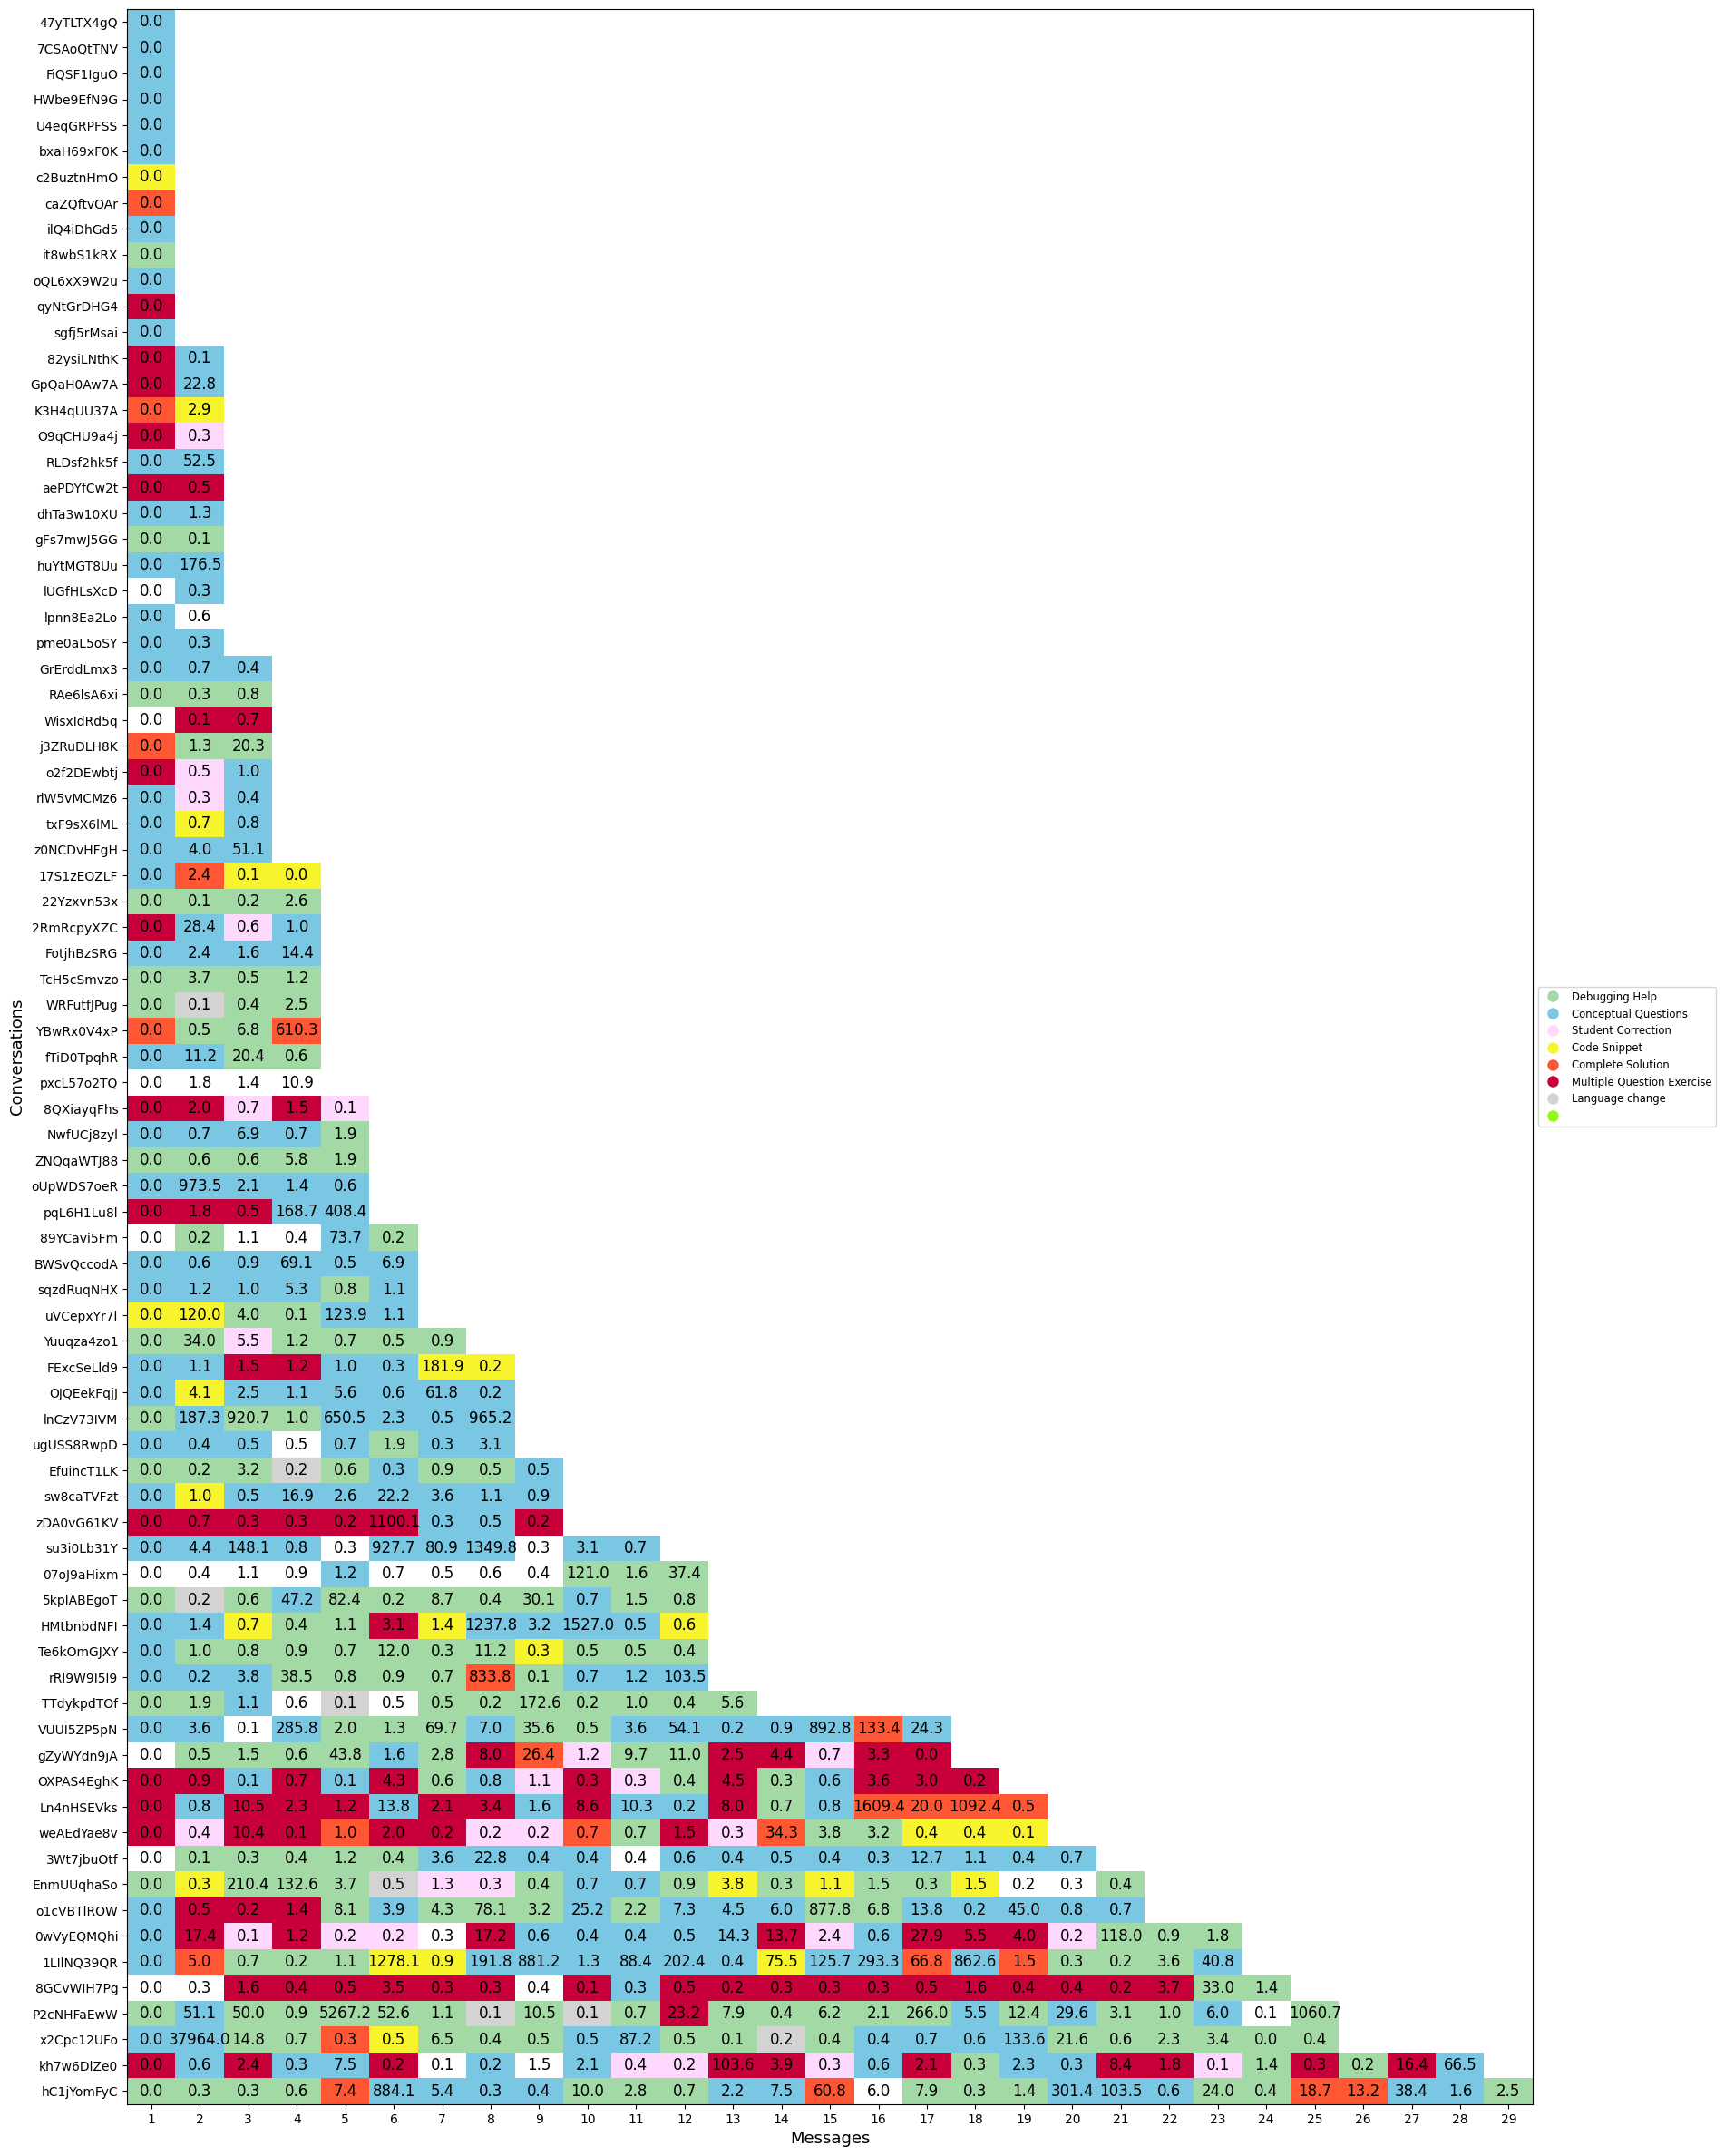

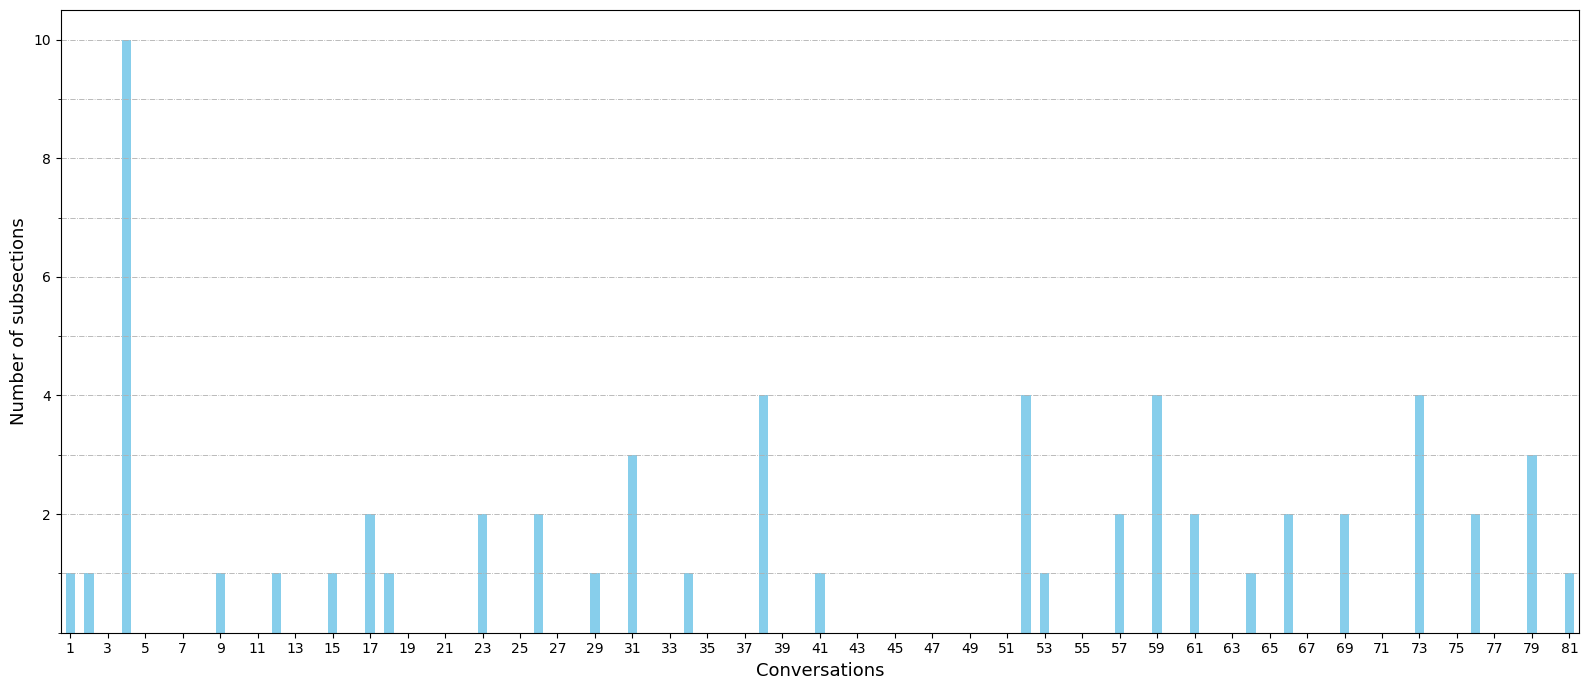

---------------- Spacing  -------------------
Number of messages longer than 60 minutes: 60
Percentage of messages longer than 60 minutes: 9.60%
Average number of messages longer than 60 minutes per conversation: 2.22
--
Number of conversations longer than 60 minutes: 27
Percentage of conversations longer than 60 minutes: 33.33%
---------------- Spacing  -------------------


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to convert hex color codes to RGB format
def hex_to_rgb(hex_value):
    if isinstance(hex_value, float):
        return (255, 255, 255)  # Return white color for float values
    hex_value = hex_value.lstrip('#')  # Remove the hash symbol from the hex code
    return tuple(int(hex_value[i:i+2], 16) for i in (0, 2, 4))  # Convert hex to RGB tuple

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged_result.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Filter the DataFrame to only include rows where 'Role' column is 'User'
df = df[df['Role'] == 'User']

# Drop unnecessary columns: 'Role', 'Message', and AI-related columns
df = df.drop(columns=['Role', 'Message', 'AI - 1%', 'AI - 2%', 'AI - 3%', 'AI - 4%'])

# Create a dictionary to map classification labels to their respective color codes
classification_colors = {
    'Debugging Help': '#A3D9A5',
    'Conceptual Questions': '#79C7E3',
    'Student Correction': '#FED9FD',
    'Code Snippet': '#F7F42D',
    'Complete Solution': '#FF5733',
    'Multiple Question Exercise': '#C70039',
    'Language change': '#D3D3D3',
    '': '#91FC09',
}

# Map each 'Classification' in the DataFrame to its corresponding color using the dictionary
df['Color'] = df['Classification'].map(classification_colors)

# Truncate the 'Id' column to the first 10 characters
df['Id'] = df['Id'].str[:10]

# Sort data by 'Id' and 'Datetime' to ensure proper order
df = df.sort_values(by=['Id', 'Datetime'])

# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Save the modified DataFrame to a new CSV file
df.to_csv('data/merged_result_heatmap_with_time.csv', index=False, sep=';')

# Find the maximum number of messages for any 'Id'
max_len = 0
for key in df['Id'].unique():
    if max_len < df[df['Id'] == key].shape[0]:
        max_len = df[df['Id'] == key].shape[0]

dic_colors = {}
dic_times = {}

# Populate the dictionary with {Id: [color1, color2, ..., colorN]} and time differences
for key in df['Id'].unique():
    row_colors = {key: [color for color in df[df['Id'] == key]['Color']]}
    row_times = {key: [round(time, 1) for time in df[df['Id'] == key]['TimeDeltaMinutes']]}  # Round to 1 decimal
    dic_colors.update(row_colors)
    dic_times.update(row_times)

# >>>>>>> Order dic_colors by number of messages in descending order
dic_colors = dict(sorted(dic_colors.items(), key=lambda x: len(x[1]), reverse=False))

# Fill the color list with white ('#FFFFFF') and time list with NaN to match the max length
for key in dic_colors.keys():
    dic_colors[key] = dic_colors[key] + ['#FFFFFF'] * (max_len - len(dic_colors[key]))
    dic_times[key] = dic_times[key] + [np.nan] * (max_len - len(dic_times[key]))

# Convert hex color values to RGB format for plotting
for key in dic_colors.keys():
    dic_colors[key] = [hex_to_rgb(color) for color in dic_colors[key]]

# >>>>>>> Uncomment to display the 15 first conversations
#dic_colors = dict(list(dic_colors.items())[:15])


# Plot the heatmap with time intervals in the cells
fig, ax = plt.subplots(figsize=(20, 30))  # Aumente o valor de figsize conforme necessário

# Set axis labels
ax.set_xlabel('Messages', fontsize=13)
ax.set_ylabel('Conversations', fontsize=13)

# Set ticks for the x-axis and y-axis
ax.set_xticks(range(max_len))
ax.set_xticklabels(range(1, max_len + 1))  # Definir o rótulo para começar em 1

ax.set_yticks(range(len(dic_colors)))
ax.set_yticklabels(range(1, len(dic_colors) + 1))

# >>>>>>> Uncomment to show the 'Id' values on the y-axis
ax.set_yticklabels(dic_colors.keys())

# Display the heatmap using the list of RGB color values
heatmap = ax.imshow(list(dic_colors.values()), aspect='auto')

# >>>>>>> Annotate each cell with the time delta in minutes, and use a smaller font size
for i, key in enumerate(dic_colors.keys()):
    for j, time in enumerate(dic_times[key]):
        if not np.isnan(time):  # Annotate only if time is not NaN
            ax.text(j, i, f'{time:.1f}', ha='center', va='center', color='black', fontsize=12)  # Small font

# Create a legend with classification labels and their respective colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in classification_colors.items()]

# Position the legend on the right side of the plot with a larger font size
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='', fontsize='small')

# Show the heatmap plot
plt.show()


# ####################


# Count in each record of the dataframe how many messages are longer than 60 minutes and store in a new column
df['Subsessions'] = df.groupby('Id')['TimeDeltaMinutes'].transform(lambda x: (x > 60).sum())

# Save the modified DataFrame to a new CSV file
df.to_csv('data/subsessions.csv', index=False, sep=';')

# Plot the number of subsessions for each conversation
fig, ax = plt.subplots(figsize=(16,7))

# Count the number of subsessions for each conversation
subsessions_count = df.groupby('Id')['Subsessions'].max()

# Plot the bar chart
subsessions_count.plot(kind='bar', ax=ax, color='skyblue')

# Set axis labels and title
ax.set_xlabel('Conversations', fontsize=13)
ax.set_ylabel('Number of subsections', fontsize=13)
#ax.set_title('Number of subsessions per conversation', fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=10)  # Set the font size of x-axis labels to be smaller

# Adjust x-axis to show 1 to N
ax.set_xticks(range(len(subsessions_count)))
ax.set_xticklabels(range(1, len(subsessions_count) + 1))

# Show only odd numbers on the x-axis
ax.set_xticks([i for i in range(len(subsessions_count)) if (i + 1) % 2 != 0])
ax.set_xticklabels([i + 1 for i in range(len(subsessions_count)) if (i + 1) % 2 != 0])

# Set y-axis to have a more precise scale with more subdivisions
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='lower'))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(which='both', axis='y', linestyle='-.', linewidth=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# ####################

print("---------------- Spacing  -------------------")
# Count the number of messages with delta time greater than 60 minutes
messages_long_hour = df[df['TimeDeltaMinutes'] > 60].shape[0]
# % of messages longer than 60 minutes
# Count the number of conversation with delta time greater than 60 minutes
conversations_long_hour = df[df['TimeDeltaMinutes'] > 60]['Id'].nunique()

percentage_long_hour = (messages_long_hour / df.shape[0]) * 100
print(f"Number of messages longer than 60 minutes: {messages_long_hour}")
print(f"Percentage of messages longer than 60 minutes: {percentage_long_hour:.2f}%")

# Average number of messages longer than 60 minutes per conversation
average_messages_long_hour_per_conversation = messages_long_hour / conversations_long_hour
print(f"Average number of messages longer than 60 minutes per conversation: {average_messages_long_hour_per_conversation:.2f}")

print("--")

# % of conversation longer than 60 minutes
percentage_conversations_long_hour = (conversations_long_hour / df['Id'].nunique()) * 100
print(f"Number of conversations longer than 60 minutes: {conversations_long_hour}")
print(f"Percentage of conversations longer than 60 minutes: {percentage_conversations_long_hour:.2f}%")
print("---------------- Spacing  -------------------")



## General data and categories spacing

Number of conversations: 81
Number of messages: 625
Average number of messages per conversation: 7.72
>>>>>>>> Messages with time greater than 60 minutes were removed.
Standard deviation for each classification:
Code Snippet: 1.74 minutes
Language Change: 3.28 minutes
Uncategorized: 3.65 minutes
Multiple Question: 6.10 minutes
Student Correction: 7.33 minutes
Debugging Help: 10.13 minutes
Complete Solution: 10.41 minutes
Conceptual Questions: 10.54 minutes


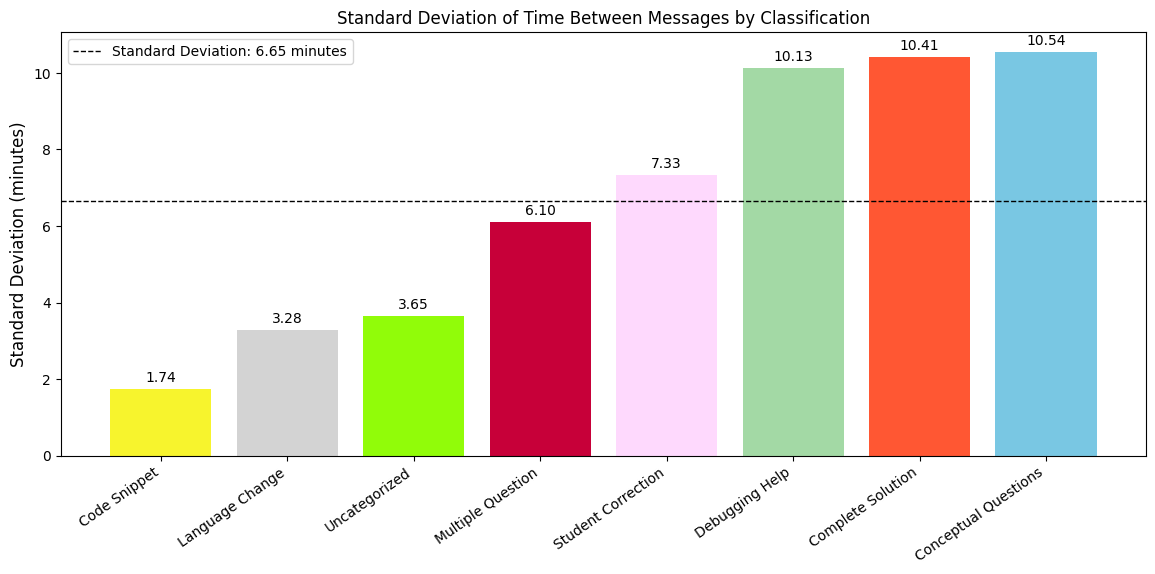

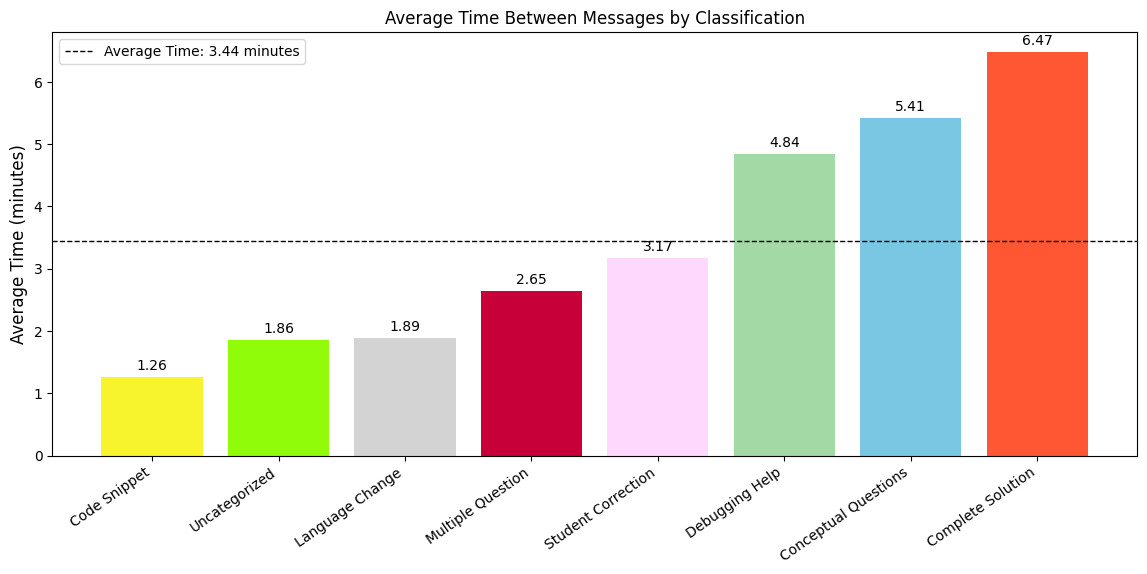

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged_result.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Filter the DataFrame to only include rows where 'Role' column is 'User'
df = df[df['Role'] == 'User']

# Truncate the 'Id' column to the first 10 characters
df['Id'] = df['Id'].str[:10]

# Sort data by 'Id' and 'Datetime' to ensure proper order
df = df.sort_values(by=['Id', 'Datetime'])

# Drop unnecessary columns: 'Role', 'Message', and AI-related columns
df = df.drop(columns=['AI - 1%', 'AI - 2%', 'AI - 3%', 'AI - 4%'])

# Save the modified DataFrame to a new CSV file
df.to_csv('data/merged_result_general.csv', index=False, sep=';')

# Number of conversations
unique_students = df['Id'].nunique()
print(f'Number of conversations: {unique_students}')

# Number of student messages
unique_messages = df.shape[0]
print(f'Number of messages: {unique_messages}')

# Average number of messages per conversation
avg_messages_per_student = unique_messages / unique_students
print(f'Average number of messages per conversation: {avg_messages_per_student:.2f}')

# For each classification, calculate the average time between the next message
# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Save a temp file
df.to_csv('data/test-temp.csv', index=False, sep=';')

# Code Snippet time
code_snippet_time = []
# Debugging Help time
debugging_help_time = []
# Conceptual Questions time
conceptual_questions_time = []
# Student Correction time
student_correction_time = []
# Complete Solution time
complete_solution_time = []
# Multiple Question Exercise time
multiple_question_exercise_time = []
# Language change time
language_change_time = []
# Uncategorized time
uncategorized_time = []

count_time_hour = 0
count_time_day = 0

for key in df['Id'].unique():
	# Pega a conversa inteira desse Id e redefine os índices
	conversation = df[df['Id'] == key].sort_values(by='Datetime').reset_index(drop=True)
	# Loop sobre a conversa
	for index, message in conversation.iterrows():
			if message['Classification'] == 'Code Snippet':
				# Verificar se existe uma próxima linha
				if index + 1 < len(conversation):
						next_row = conversation.iloc[index + 1]
						code_snippet_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Debugging Help':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					debugging_help_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Conceptual Questions':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					conceptual_questions_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Student Correction':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					student_correction_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Complete Solution':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					complete_solution_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Multiple Question Exercise':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					multiple_question_exercise_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Language change':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					language_change_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Uncategorized':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					#print(key + " -- " + str(next_row['TimeDeltaMinutes']))
					uncategorized_time.append(next_row['TimeDeltaMinutes'])


# Remove mesages com tempo maior que 60 minutos (por conta das subsessoes)
print(">>>>>>>> Messages with time greater than 60 minutes were removed.")
debugging_help_time = [time for time in debugging_help_time if time < 60]
conceptual_questions_time = [time for time in conceptual_questions_time if time < 60]
student_correction_time = [time for time in student_correction_time if time < 60]
code_snippet_time = [time for time in code_snippet_time if time < 60]
complete_solution_time = [time for time in complete_solution_time if time < 60]
multiple_question_exercise_time = [time for time in multiple_question_exercise_time if time < 60]
language_change_time = [time for time in language_change_time if time < 60]
uncategorized_time = [time for time in uncategorized_time if time < 60]

dict_time_classification = []
std_debugging_help_time = np.std(debugging_help_time)
dict_time_classification.append({'Classification': 'Debugging Help', 'Standard Deviation': std_debugging_help_time})

std_conceptual_questions_time = np.std(conceptual_questions_time)
dict_time_classification.append({'Classification': 'Conceptual Questions', 'Standard Deviation': std_conceptual_questions_time})

std_student_correction_time = np.std(student_correction_time)
dict_time_classification.append({'Classification': 'Student Correction', 'Standard Deviation': std_student_correction_time})

std_code_snippet_time = np.std(code_snippet_time)
dict_time_classification.append({'Classification': 'Code Snippet', 'Standard Deviation': std_code_snippet_time})

std_complete_solution_time = np.std(complete_solution_time)
dict_time_classification.append({'Classification': 'Complete Solution', 'Standard Deviation': std_complete_solution_time})

std_multiple_question_exercise_time = np.std(multiple_question_exercise_time)
dict_time_classification.append({'Classification': 'Multiple Question', 'Standard Deviation': std_multiple_question_exercise_time})

std_language_change_time = np.std(language_change_time)
dict_time_classification.append({'Classification': 'Language Change', 'Standard Deviation': std_language_change_time})

std_uncategorized_time = np.std(uncategorized_time)
dict_time_classification.append({'Classification': 'Uncategorized', 'Standard Deviation': std_uncategorized_time})

# order dict_time_classification by 'Standard Deviation'
dict_time_classification = sorted(dict_time_classification, key=lambda k: k['Standard Deviation'], reverse=False)

print("Standard deviation for each classification:")
for item in dict_time_classification:
	print(f"{item['Classification']}: {item['Standard Deviation']:.2f} minutes")

# Total standard deviation
total_std_time = (std_debugging_help_time + std_conceptual_questions_time + std_student_correction_time + std_code_snippet_time + std_complete_solution_time + std_multiple_question_exercise_time + std_language_change_time + std_uncategorized_time) / 8

classification_colors = {
	'Debugging Help': '#A3D9A5',
	'Conceptual Questions': '#79C7E3',
	'Student Correction': '#FED9FD',
	'Code Snippet': '#F7F42D',
	'Complete Solution': '#FF5733',
	'Multiple Question': '#C70039',
	'Language Change': '#D3D3D3',
	'Uncategorized': '#91FC09',
}

# Create a plot for dict_time_classification.
fig, ax = plt.subplots(figsize=(14, 5.5))
bars = ax.bar(
	[item['Classification'] for item in dict_time_classification],
	[item['Standard Deviation'] for item in dict_time_classification],
	color=[classification_colors[item['Classification']] for item in dict_time_classification]
)
ax.set_ylabel('Standard Deviation (minutes)', fontsize=12)
ax.set_title('Standard Deviation of Time Between Messages by Classification', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)  # Decrease font size and rotate x-axis labels

# Add a dashed line for the total standard deviation
ax.axhline(total_std_time, color='black', linestyle='--', linewidth=1, label=f'Standard Deviation: {total_std_time:.2f} minutes')
ax.legend()

# Add standard deviation values on top of each bar
for bar in bars:
	height = bar.get_height()
	ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

# Create a plot for the average time between messages for each classification.
avg_time_classification = [
	{'Classification': 'Debugging Help', 'Average Time': np.mean(debugging_help_time)},
	{'Classification': 'Conceptual Questions', 'Average Time': np.mean(conceptual_questions_time)},
	{'Classification': 'Student Correction', 'Average Time': np.mean(student_correction_time)},
	{'Classification': 'Code Snippet', 'Average Time': np.mean(code_snippet_time)},
	{'Classification': 'Complete Solution', 'Average Time': np.mean(complete_solution_time)},
	{'Classification': 'Multiple Question', 'Average Time': np.mean(multiple_question_exercise_time)},
	{'Classification': 'Language Change', 'Average Time': np.mean(language_change_time)},
	{'Classification': 'Uncategorized', 'Average Time': np.mean(uncategorized_time)},
]

# Sort by average time
avg_time_classification = sorted(avg_time_classification, key=lambda k: k['Average Time'], reverse=False)

fig, ax = plt.subplots(figsize=(14, 5.5))
bars = ax.bar(
	[item['Classification'] for item in avg_time_classification],
	[item['Average Time'] for item in avg_time_classification],
	color=[classification_colors[item['Classification']] for item in avg_time_classification]
)
ax.set_ylabel('Average Time (minutes)', fontsize=12)
ax.set_title('Average Time Between Messages by Classification', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)  # Decrease font size and rotate x-axis labels

# Add a dashed line for the total average time
total_avg_time = np.mean([item['Average Time'] for item in avg_time_classification])
ax.axhline(total_avg_time, color='black', linestyle='--', linewidth=1, label=f'Average Time: {total_avg_time:.2f} minutes')
ax.legend()

# Add average time values on top of each bar
for bar in bars:
	height = bar.get_height()
	ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()


##   Blocks

In [4]:
# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged_result.csv', sep=';')

# Filter only the rows where the 'Role' column is 'User'
df = df[df['Role'] == 'User']

BLOCK_SIZE = 2

conceptual_block = []
debugging_block = []
quiz_block = []
code_snippet_block = []
complete_solution_block = []
student_correction_block = []
uncategorized_block = []

total_computed_conversations = 0

# loop by each conversation (unique id)
for key in df['Id'].unique():
    # Filter the DataFrame to only include rows with the current 'Id'
    conversation = df[df['Id'] == key]

    # if the conversation has more than 3 messages
    if conversation.shape[0] <= BLOCK_SIZE:
        continue
    else:
        conceptual_count = 0
        debugging_help_count = 0
        quiz_count = 0
        code_snippet_count = 0
        complete_solution_count = 0
        student_correction_count = 0
        uncategorized_count = 0

        total_computed_conversations += conversation.shape[0]

        for i in range(conversation.shape[0]):
            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Conceptual Questions', 'Language change']:
                conceptual_count += 1
            else:
                if conceptual_count >= BLOCK_SIZE:
                    conceptual_block.append({'Id': key, 'Count': conceptual_count})
                conceptual_count = 0

            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Debugging Help', 'Language change']:
                debugging_help_count += 1
            else:
                if debugging_help_count >= BLOCK_SIZE:
                    debugging_block.append({'Id': key, 'Count': debugging_help_count})
                debugging_help_count = 0

            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Multiple Question Exercise', 'Language change']:
                quiz_count += 1
            else:
                if quiz_count >= BLOCK_SIZE:
                    quiz_block.append({'Id': key, 'Count': quiz_count})
                quiz_count = 0

            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Code Snippet', 'Language change']:
                code_snippet_count += 1
            else:
                if code_snippet_count >= BLOCK_SIZE:
                    code_snippet_block.append({'Id': key, 'Count': code_snippet_count})
                code_snippet_count = 0

            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Complete Solution', 'Language change']:
                complete_solution_count += 1
            else:
                if complete_solution_count >= BLOCK_SIZE:
                    complete_solution_block.append({'Id': key, 'Count': complete_solution_count})
                complete_solution_count = 0

            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Student Correction', 'Language change']:
                student_correction_count += 1
            else:
                if complete_solution_count >= BLOCK_SIZE:
                    student_correction_block.append({'Id': key, 'Count': student_correction_count})
                student_correction_count = 0

            if conversation.iat[i, conversation.columns.get_loc('Classification')] in ['Uncategorized', 'Language change']:
                uncategorized_count += 1
            else:
                if complete_solution_count >= BLOCK_SIZE:
                    uncategorized_block.append({'Id': key, 'Count': uncategorized_count})
                uncategorized_count = 0


        # Check at the end of the conversation
        if conceptual_count >= BLOCK_SIZE:
            conceptual_block.append({'Id': key, 'Count': conceptual_count})

        if debugging_help_count >= BLOCK_SIZE:
            debugging_block.append({'Id': key, 'Count': debugging_help_count})

        if quiz_count >= 3:
            quiz_block.append({'Id': key, 'Count': quiz_count})

        if code_snippet_count >= BLOCK_SIZE:
            code_snippet_block.append({'Id': key, 'Count': code_snippet_count})

        if complete_solution_count >= BLOCK_SIZE:
            complete_solution_block.append({'Id': key, 'Count': complete_solution_count})

        if student_correction_count >= BLOCK_SIZE:
            student_correction_block.append({'Id': key, 'Count': student_correction_count})

        if uncategorized_count >= BLOCK_SIZE:
            uncategorized_block.append({'Id': key, 'Count': uncategorized_count})

print(f"Block size: {BLOCK_SIZE}")

total_blocks = len(conceptual_block) + len(debugging_block) + len(quiz_block) + len(code_snippet_block) + len(complete_solution_block) + len(student_correction_block) + len(uncategorized_block)
print(f"Total blocks: {total_blocks}")

# Merge all blocks into a single list
all_blocks = conceptual_block + debugging_block + quiz_block + code_snippet_block + complete_solution_block + student_correction_block + uncategorized_block

# Count the total of messages from df
total_messages_df = df.shape[0]
print(f"Total messages in DF: {total_messages_df}")
print(f"Total of messages considered: {total_computed_conversations}")

# loop all blocks to count the total of messages
total_messages_blocks = 0
for block in all_blocks:
    total_messages_blocks += block['Count']
print(f"Total of messages in blocks: {total_messages_blocks}")

# Calculate the percentage of messages in blocks
percentage_messages = (total_messages_blocks * 100) / total_computed_conversations
print(f"Percentage of messages in blocks: {percentage_messages:.2f}%")

print("---------------- Blocks -------------------")
print(f"Conceptual {len(conceptual_block)}")
print(f"Debugging {len(debugging_block)}")
print(f"Quiz {len(quiz_block)}")
print(f"Code Snippet {len(code_snippet_block)}")
print(f"Complete Solution {len(complete_solution_block)}")
print(f"Student Correction {len(student_correction_block)}")
print(f"Uncategorized {len(uncategorized_block)}")


Block size: 2
Total blocks: 123
Total messages in DF: 625
Total of messages considered: 580
Total of messages in blocks: 386
Percentage of messages in blocks: 66.55%
---------------- Blocks -------------------
Conceptual 42
Debugging 48
Quiz 17
Code Snippet 5
Complete Solution 2
Student Correction 4
Uncategorized 5


## Claude.ai

AI - 1%: Yes = 18, No = 6, Total = 24
AI - 2%: Yes = 22, No = 20, Total = 42
AI - 3%: Yes = 25, No = 19, Total = 44
AI - 4%: Yes = 188, No = 41, Total = 229
AI - 11%: Yes = 230, No = 56, Total = 286
AI - 1%: Yes = 75.00%, No = 25.00%
AI - 2%: Yes = 52.38%, No = 47.62%
AI - 3%: Yes = 56.82%, No = 43.18%
AI - 4%: Yes = 82.10%, No = 17.90%
AI - 11%: Yes = 80.42%, No = 19.58%


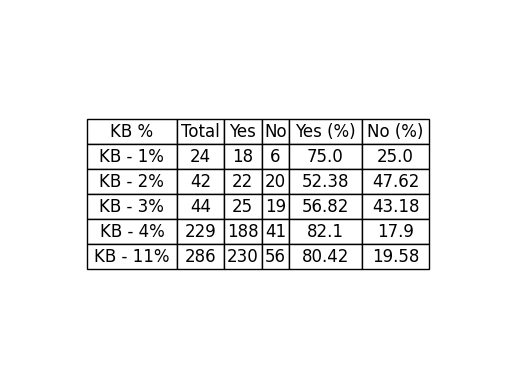

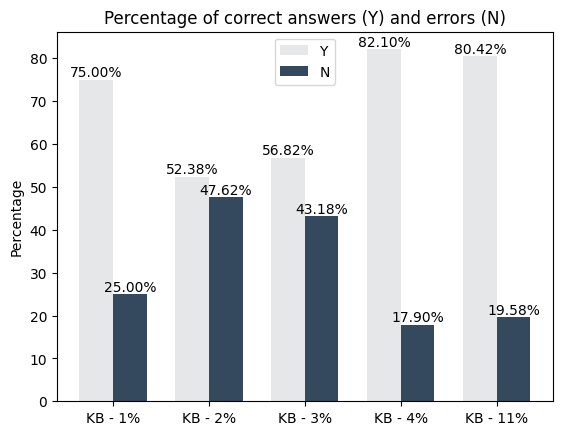

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o merged_result.csv
df = pd.read_csv('data/merged_result.csv', delimiter=';')

# Contar a quantidade de registros com valor "Yes" ou "No" da coluna "AI - 1%"
ai_1_yes = df[df['AI - 1%'] == 'Yes'].shape[0]
ai_1_no = df[df['AI - 1%'] == 'No'].shape[0]

# Soma de "Yes" e "No" na coluna "AI - 1%"
ai_1_total = ai_1_yes + ai_1_no

# Contar a quantidade de registros com valor "Yes" ou "No" da coluna "AI - 2%"
ai_2_yes = df[df['AI - 2%'] == 'Yes'].shape[0]
ai_2_no = df[df['AI - 2%'] == 'No'].shape[0]

# Soma de "Yes" e "No" na coluna "AI - 2%"
ai_2_total = ai_2_yes + ai_2_no

# Contar a quantidade de registros com valor "Yes" ou "No" da coluna "AI - 3%"
ai_3_yes = df[df['AI - 3%'] == 'Yes'].shape[0]
ai_3_no = df[df['AI - 3%'] == 'No'].shape[0]

# Soma de "Yes" e "No" na coluna "AI - 3%"
ai_3_total = ai_3_yes + ai_3_no

# Contar a quantidade de registros com valor "Yes" ou "No" da coluna "AI - 4%"
ai_4_yes = df[df['AI - 4%'] == 'Yes'].shape[0]
ai_4_no = df[df['AI - 4%'] == 'No'].shape[0]

# Soma de "Yes" e "No" na coluna "AI - 4%"
ai_4_total = ai_4_yes + ai_4_no

# Contar a quantidade de registros com valor "Yes" ou "No" da coluna "AI - 11%"
ai_11_yes = df[df['AI - 11%'] == 'Yes'].shape[0]
ai_11_no = df[df['AI - 11%'] == 'No'].shape[0]

# Soma de "Yes" e "No" na coluna "AI - 11%"
ai_11_total = ai_11_yes + ai_11_no

# Mostrar a soma de "Yes" e "No" para cada coluna
print(f"AI - 1%: Yes = {ai_1_yes}, No = {ai_1_no}, Total = {ai_1_total}")
print(f"AI - 2%: Yes = {ai_2_yes}, No = {ai_2_no}, Total = {ai_2_total}")
print(f"AI - 3%: Yes = {ai_3_yes}, No = {ai_3_no}, Total = {ai_3_total}")
print(f"AI - 4%: Yes = {ai_4_yes}, No = {ai_4_no}, Total = {ai_4_total}")
print(f"AI - 11%: Yes = {ai_11_yes}, No = {ai_11_no}, Total = {ai_11_total}")

# Calcular percentuais para cada coluna
ai_1_yes_percentage = (ai_1_yes / ai_1_total) * 100
ai_1_no_percentage = (ai_1_no / ai_1_total) * 100

ai_2_yes_percentage = (ai_2_yes / ai_2_total) * 100
ai_2_no_percentage = (ai_2_no / ai_2_total) * 100

ai_3_yes_percentage = (ai_3_yes / ai_3_total) * 100
ai_3_no_percentage = (ai_3_no / ai_3_total) * 100

ai_4_yes_percentage = (ai_4_yes / ai_4_total) * 100
ai_4_no_percentage = (ai_4_no / ai_4_total) * 100

ai_11_yes_percentage = (ai_11_yes / ai_11_total) * 100
ai_11_no_percentage = (ai_11_no / ai_11_total) * 100

# Mostrar os percentuais para cada coluna
print(f"AI - 1%: Yes = {ai_1_yes_percentage:.2f}%, No = {ai_1_no_percentage:.2f}%")
print(f"AI - 2%: Yes = {ai_2_yes_percentage:.2f}%, No = {ai_2_no_percentage:.2f}%")
print(f"AI - 3%: Yes = {ai_3_yes_percentage:.2f}%, No = {ai_3_no_percentage:.2f}%")
print(f"AI - 4%: Yes = {ai_4_yes_percentage:.2f}%, No = {ai_4_no_percentage:.2f}%")
print(f"AI - 11%: Yes = {ai_11_yes_percentage:.2f}%, No = {ai_11_no_percentage:.2f}%")

# Dados atualizados conforme solicitado
categorias = ['KB - 1%', 'KB - 2%', 'KB - 3%', 'KB - 4%', 'KB - 11%']
yes_counts = [ai_1_yes, ai_2_yes, ai_3_yes, ai_4_yes, ai_11_yes]
no_counts = [ai_1_no, ai_2_no, ai_3_no, ai_4_no, ai_11_no]
totals = [ai_1_total, ai_2_total, ai_3_total, ai_4_total, ai_11_total]
yes_percentages = [round(ai_1_yes_percentage, 2), round(ai_2_yes_percentage, 2), round(ai_3_yes_percentage, 2), round(ai_4_yes_percentage, 2), round(ai_11_yes_percentage, 2)]
no_percentages = [round(ai_1_no_percentage, 2), round(ai_2_no_percentage, 2), round(ai_3_no_percentage, 2), round(ai_4_no_percentage, 2), round(ai_11_no_percentage, 2)]

# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Esconder os eixos
ax.axis('tight')
ax.axis('off')

# Dados da tabela incluindo o cabeçalho
table_data = [
    ["KB %", "Total", "Yes", "No", "Yes (%)", "No (%)"]
] + list(zip(categorias, totals, yes_counts, no_counts, yes_percentages, no_percentages))

# Criar a tabela
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Ajustar o tamanho e espaçamento das células
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

table.auto_set_column_width(col=list(range(len(categorias) + 4)))  # Ajustado para o número de colunas

plt.show()


# Gerar um gráfico de barras
labels = ['KB - 1%', 'KB - 2%', 'KB - 3%', 'KB - 4%', 'KB - 11%']
yes = [ai_1_yes_percentage, ai_2_yes_percentage, ai_3_yes_percentage, ai_4_yes_percentage, ai_11_yes_percentage]
no = [ai_1_no_percentage, ai_2_no_percentage, ai_3_no_percentage, ai_4_no_percentage, ai_11_no_percentage]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
# Definir novas cores
yes_colors = ['#E5E7E9', '#E5E7E9', '#E5E7E9']
no_colors = ['#34495E', '#34495E', '#34495E']

rects1 = ax.bar(x, yes, width, label='Y', color=yes_colors)
rects2 = ax.bar([p + width for p in x], no, width, label='N', color=no_colors)

ax.set_ylabel('Percentage')
ax.set_title('Percentage of correct answers (Y) and errors (N)')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Adicionar percentuais em cima das barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.,
            height,
            f'{height:.2f}%',
            ha='center',
            va='bottom'
        )

add_labels(rects1)
add_labels(rects2)

plt.show()

## Sentiment analysis (TextBlob)

Sentiment_Label
Neutral     473
Positive    107
Negative     45
Name: count, dtype: int64
                                               Message  Sentiment  \
36   for (PPacket node1 = first; node1 != null; nod...   0.390625   
39   if (min.getPriority() > node2.getPriority()) {...   0.136364   
63   public class prueba {\n    public static void ...   0.166667   
75                que implica que un metodo sea static   0.500000   
78   Given the following code, what does the progra...   0.185185   
84   si hay que pasar por parametro en el construct...   0.095238   
102                               el metodo top perdon   0.500000   
105              cual es la diferencia entre pop y top   0.500000   
171  ¿Dada la variable String str = "Hola!", ¿Cuál ...   0.136364   
174  public int leafs (BTree tree){\n    try{\n    ...   0.095238   

    Sentiment_Label  
36         Positive  
39         Positive  
63         Positive  
75         Positive  
78         Positive  
84         Positiv

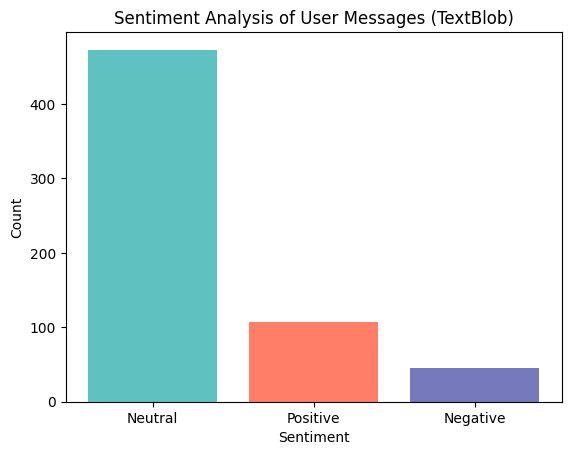

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Ler o merged_result.csv
df = pd.read_csv('data/merged_result.csv', delimiter=';')

# Filtrar apenas a role user
# Filtrar apenas a role user e criar as novas colunas "Sentiment" e "Sentiment_Label" de forma segura
df.loc[df['Role'] == 'User', 'Sentiment'] = df.loc[df['Role'] == 'User', 'Message'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.polarity
)

df.loc[df['Role'] == 'User', 'Sentiment_Label'] = df.loc[df['Role'] == 'User', 'Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative')
)

# Agora, filtrar novamente para obter apenas as linhas com role 'User'
role_user = df[df['Role'] == 'User']

# Continuar com a criação do arquivo CSV e a contagem dos sentimentos como antes
role_user.to_csv('data/sentiments.csv', index=False, sep=';')

sentiment_counts = role_user['Sentiment_Label'].value_counts()
print(sentiment_counts)

# Me mostre 10 exemplos de mensagens com sentimento positivo
positive_messages = role_user[role_user['Sentiment_Label'] == 'Positive'].head(10)
print(positive_messages[['Message', 'Sentiment', 'Sentiment_Label']])

# Me mostre 10 exemplos de mensagens com sentimento negativo
negative_messages = role_user[role_user['Sentiment_Label'] == 'Negative'].head(10)
print(negative_messages[['Message', 'Sentiment', 'Sentiment_Label']])

# Gráfico de barras

# Definir os rótulos e os valores
labels = sentiment_counts.index
values = sentiment_counts.values

# Definir as cores
colors = ['#5EC2C0', '#FF7E67', '#7779BD']

# Criar o gráfico de barras
plt.bar(labels, values, color=colors)

# Adicionar rótulos
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of User Messages (TextBlob)')

# Exibir o gráfico
plt.show()


